In [76]:
from sklearn.datasets import make_regression
import numpy as np

In [77]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

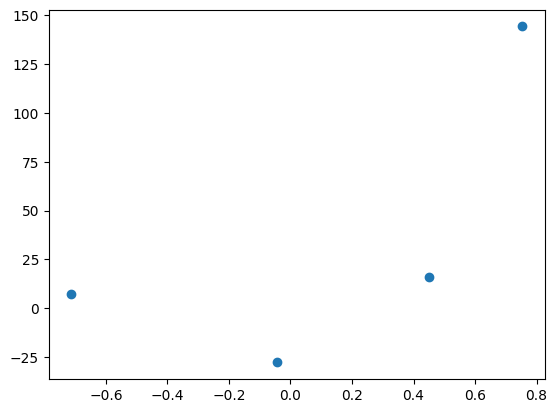

In [78]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [79]:
#Lets Apply OLS
from sklearn.linear_model import LinearRegression

In [80]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [81]:
reg.coef_

array([78.35063668])

In [82]:
reg.intercept_

26.15963284313262

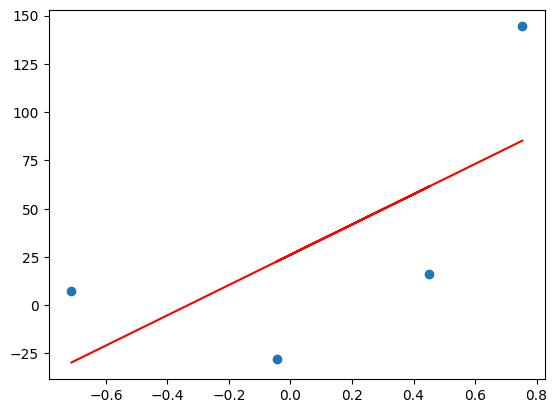

In [83]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')

In [84]:
#Lets apply gradient descent assuming slope is constant m = 78.35
#and lets's assume the staring value of intercept b = 0
y_pred = ((78.65 * X) + 0).reshape(4)

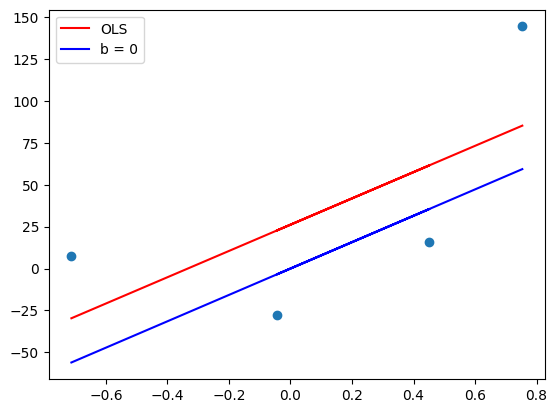

In [85]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', label='OLS')
plt.plot(X, y_pred, color='blue', label='b = 0')
plt.legend()
plt.show()

In [86]:
m = 78.5
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.14302858898708

In [87]:
lr = 0.1

step_size = loss_slope * lr
step_size

-20.914302858898708

In [88]:
b = b - step_size
b

20.914302858898708

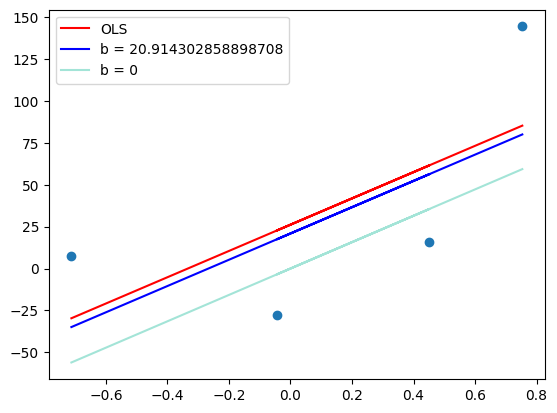

In [89]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='blue',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()


In [90]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.82860571779743

In [91]:
step_size = loss_slope*lr
step_size

-4.182860571779743

In [92]:
b = b - step_size
b

25.09716343067845

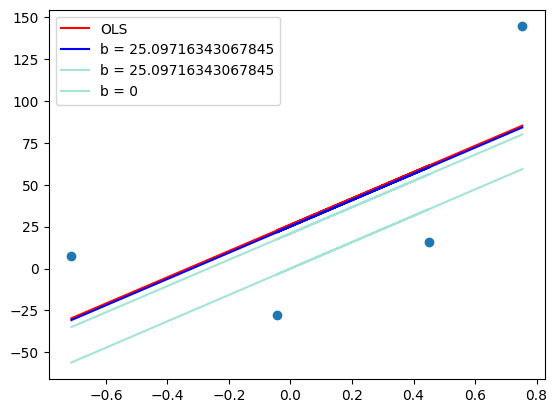

In [93]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='blue',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [94]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.365721143559497

In [95]:
step_size = loss_slope*lr
step_size

-0.8365721143559498

In [96]:
b = b - step_size
b

25.9337355450344

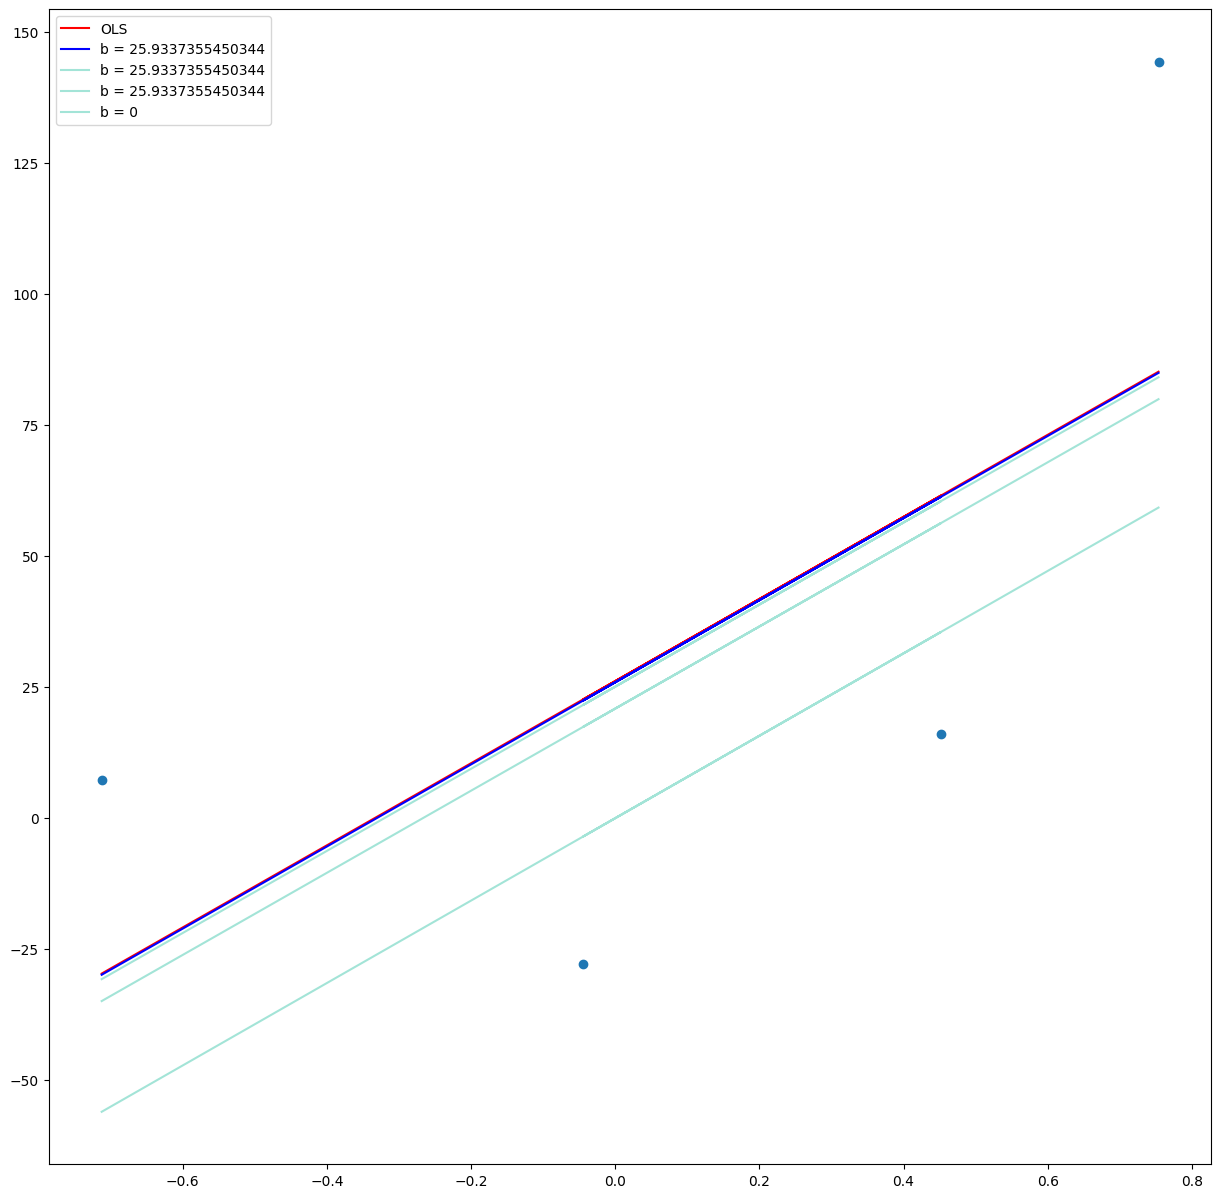

In [97]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='blue',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

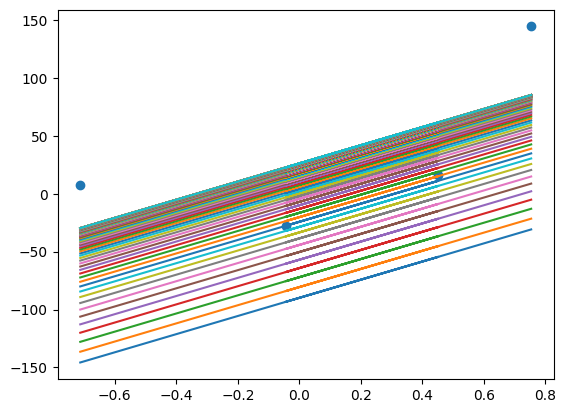

In [98]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

# ***Applying Gradient Descent algorithm from scratch***


In [99]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [100]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

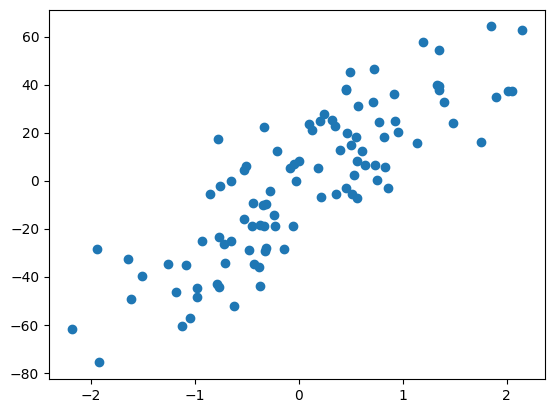

In [101]:
plt.scatter(X,y)

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [106]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [107]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 29.19
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [108]:
gd = GDRegressor(0.001, 100)

In [109]:
gd.fit(X_train, y_train)

28.12597933298948 -2.271019850147336


In [110]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158550454959